In [1]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
slices = [f for f in os.listdir('data/MPD') if f.endswith(".json")]
slice_jsons = [json.load(open(f"data/MPD/{slc}", 'r')) for slc in slices]
slice_dfs = [
    pd.DataFrame.from_dict(slc['playlists'], orient='columns')
    for slc in slice_jsons
]
df_mpd = pd.concat(slice_dfs, ignore_index=True)

# Inspect the Million Playlist Dataset "slices"

In [3]:
df_mpd.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN


# Look at distribution of playlist followers

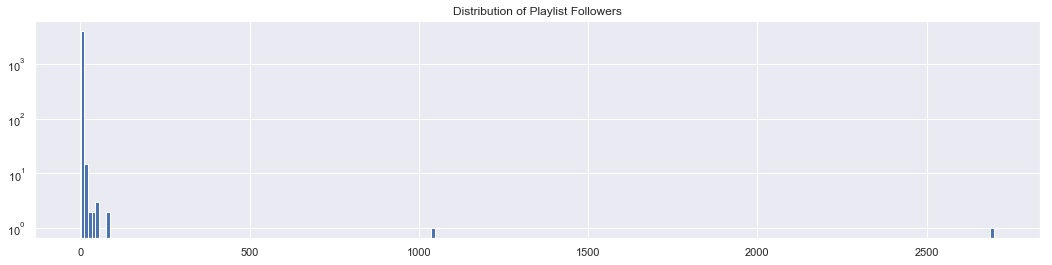

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.hist(df_mpd.num_followers, bins=250, log=True)
ax.set_title("Distribution of Playlist Followers")
plt.show()

In [5]:
percent_gt_1 = len(df_mpd.loc[df_mpd.num_followers>1])/len(df_mpd)
print(f"Percent of playlists with more than 1 follower: {percent_gt_1*100}%")

Percent of playlists with more than 1 follower: 24.7%


# Look at Most Common Songs, Albums and Artists

**Global dicionaries**

In [13]:
# Look up tables for URIs
ArtistNames = {}
SongNames = {}
AlbumNames = {}

# Counts for top values
SongCounts = {}
ArtistCounts = {}
AlbumCounts = {}

**Iterate to get counts**

In [14]:
for tracks in df_mpd.tracks:
    for track in tracks:
        # update counts
        SongCounts[track['track_uri']] = SongCounts.get(track['track_uri'], 0) + 1
        ArtistCounts[track['artist_uri']] = ArtistCounts.get(track['artist_uri'], 0) + 1
        AlbumCounts[track['album_uri']] = AlbumCounts.get(track['album_uri'], 0) + 1
        
        # update uris to name pairs
        SongNames[track['track_uri']] = track['track_name']
        ArtistNames[track['artist_uri']] = track['artist_name']
        AlbumNames[track['album_uri']] = track['album_name']

**Plot count distributions**

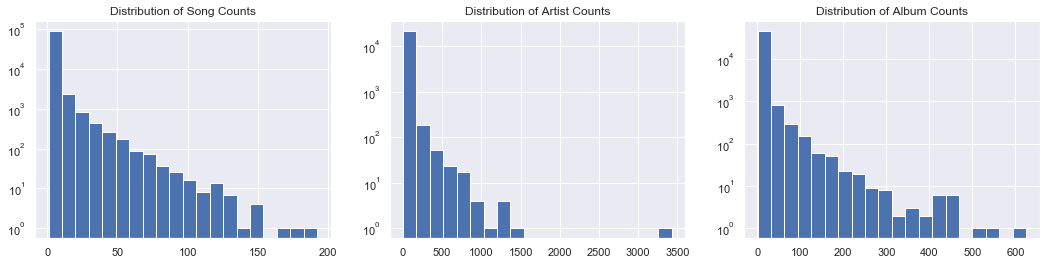

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].hist(SongCounts.values(), bins=20, log=True)
axs[1].hist(ArtistCounts.values(), bins=20, log=True)
axs[2].hist(AlbumCounts.values(), bins=20, log=True)

axs[0].set_title("Distribution of Song Counts")
axs[1].set_title("Distribution of Artist Counts")
axs[2].set_title("Distribution of Album Counts")

plt.show()

**Percent of songs appearing on more than a given number of playlists**

In [21]:
song_count_series = pd.Series(list(SongCounts.values()), index=list(SongCounts.keys()))

print(f"Total number of songs seen in the MPD: {len(song_count_vals)}")

Total number of songs seen in the MPD: 93139


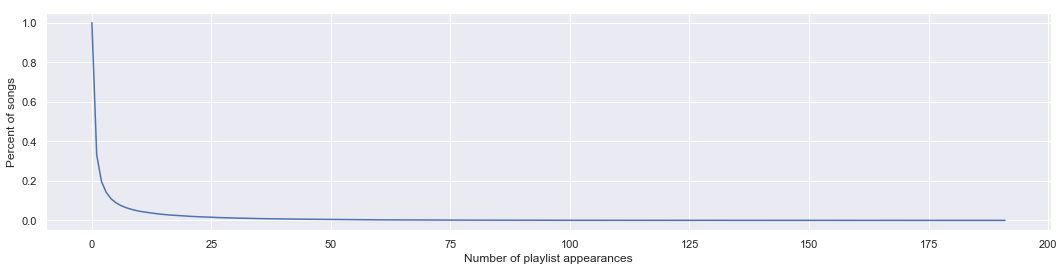

In [24]:
xs = range(0, song_count_series.max())
ys = [len(song_count_series.loc[song_count_series>x])/len(song_count_series) for x in xs]

fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(xs, ys)
ax.set_xlabel("Number of playlist appearances")
ax.set_ylabel("Percent of songs")
plt.show()

In [23]:
list(zip(xs, ys))

[(0, 1.0),
 (1, 0.33272850256068887),
 (2, 0.19714620083960532),
 (3, 0.14128345805731218),
 (4, 0.10949226425020668),
 (5, 0.08967242508508788),
 (6, 0.07583289492049518),
 (7, 0.06547203641868606),
 (8, 0.05754839540901233),
 (9, 0.05126746046231976),
 (10, 0.04618902930029311),
 (11, 0.04222720879545625),
 (12, 0.038651907364262016),
 (13, 0.035366495238299746),
 (14, 0.03237097241756944),
 (15, 0.03005185797571372),
 (16, 0.02763611376544734),
 (17, 0.026025617625269757),
 (18, 0.024211125307336347),
 (19, 0.022643575730896832),
 (20, 0.02122633912754056),
 (21, 0.01977689260138073),
 (22, 0.01873543843073256),
 (23, 0.017640301055411804),
 (24, 0.016577373602894598),
 (25, 0.015654022482526116),
 (26, 0.014623304952812463),
 (27, 0.013839530164592705),
 (28, 0.013066492017307465),
 (29, 0.01231492715189126),
 (30, 0.011735148541427329),
 (31, 0.011166106571897916),
 (32, 0.010564854679564951),
 (33, 0.010060232555642642),
 (34, 0.009609293636392919),
 (35, 0.009147618076208678),
 

In [25]:
top_songs = song_count_series.loc[song_count_series > 2].index

In [29]:
np.save('data/top_songs', np.array(top_songs))

In [30]:
with open('data/song_counts.json', 'w') as outfile:
    json.dump(SongCounts, outfile)